In [1]:
import pandas as pd

# Create the data
data = {
    "Date": ["2025-04-01"]*5 + ["2025-04-02"]*3 + ["2025-04-03"]*3 + ["2025-04-04"]*4,
    "Hour": [7, 8, 9, 17, 18, 7, 8, 17, 7, 8, 17, 7, 8, 17, 18],
    "Temperature": [10, 11, 13, 15, 14, 9, 10, 12, 8, 9, 11, 12, 13, 14, 13],
    "Rain": ["No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "No", "No"],
    "Season": ["Spring"]*15,
    "DayOfWeek": ["Tuesday"]*5 + ["Wednesday"]*3 + ["Thursday"]*3 + ["Friday"]*4,
    "BikeCount": [320, 540, 430, 610, 590, 150, 280, 520, 180, 270, 410, 400, 560, 640, 590]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("fremont_bike_custom_dataset.csv", index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


Mean Squared Error: 7463.10
R2 Score: -1.60


C:\Users\UrmilaJagtap\AppData\Local\Temp\ipykernel_25916\2989240033.py:42: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\UrmilaJagtap\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


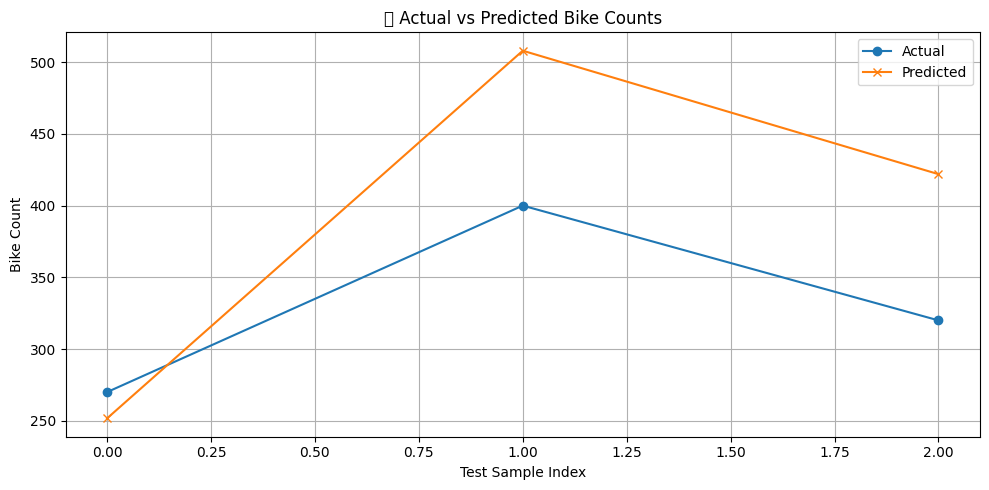

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved dataset
df = pd.read_csv("fremont_bike_custom_dataset.csv")

# Encode categorical variables
df['Rain'] = df['Rain'].map({'No': 0, 'Yes': 1})
df['DayOfWeek'] = df['DayOfWeek'].astype('category').cat.codes
df['Season'] = df['Season'].astype('category').cat.codes

# Define features and target
X = df[['Hour', 'Temperature', 'Rain', 'DayOfWeek', 'Season']]
y = df['BikeCount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("📈 Actual vs Predicted Bike Counts")
plt.xlabel("Test Sample Index")
plt.ylabel("Bike Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()